# 03 - Introduction to Pandas
**Pandas** is an open-source Python library designed to make data analysis and manipulation simple and efficient. It provides data structures like DataFrame and Series, which allow for powerful data manipulation and analysis. Pandas is built on top of NumPy, enabling it to handle large datasets and perform fast numerical operations.

## Key Features of Pandas
- **DataFrame and Series**: Flexible and easy-to-use data structures.

- **Data Manipulation**: Tools for cleaning, filtering, transforming, and aggregating data

- **Integration with File Formats**: Easily read/write from CSV, Excel, SQL databases, etc.

- **Label-Based Indexing**: Access data by labels or indices.

- **Handling Missing Data**: Pandas simplifies dealing with missing values.

## Installation
To install Pandas, you can use `pip`:

In [1]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


Once installed, you can import it as follows:

In [2]:
import pandas as pd

You only need to import a library **once** in your notebook to be able to use it in subsequent cells.

## Pandas Data Structures
Pandas provides two key data structures: **Series** and **DataFrame**.

### Series
A **Series** is a one-dimensional array that can hold any data type and is labeled by an index. It's similar to a column in a spreadsheet. A series can contain any kind of data: integers, strings, Python objects...

<p align="center">
  <img src="imgs/intro_to_pandas1.png" alt="Alt text">
</p>

A Pandas series has two distinct parts:
- **Index (index)**: An array of tags associated with the data.

- **Value (value)**: An array of data.

#### Creating a Series:
A series can be created using the `Series` class of the library with a list of elements as an argument. For example:

In [16]:
# Creating a Series from a list
data = [1, 3, 5, 7, 9]
my_series = pd.Series(data)
print(my_series)

0    1
1    3
2    5
3    7
4    9
dtype: int64


This will create a series with elements 1, 2, 3, 4 and 5. In addition, since we have not included information about the indexes, an automatic index is generated starting at 0.

You can also create a `Series` with a custom index:

In [17]:
# Creating a Series with custom indices
my_other_series = pd.Series(data, index=['a', 'b', 'c', 'd', 'e'])
print(my_other_series)

a    1
b    3
c    5
d    7
e    9
dtype: int64


The previous series has an index composed of letters.

Both series store the same values, but the way they are accessed may vary according to the index.

In a series, its elements can be accessed by index or by position (the latter is what we did in NumPy). Below are some operations that can be performed using the above series:

In [18]:
# Access the third element of `my_series`
print(my_series.iloc[2])  # By position

5


Elements in `my_other_series` can be access by position and/or by its custom index.

In [19]:
# Access the third element of `my_other_series`
print(my_other_series.iloc[2])  # By position
print(my_other_series["c"])  # By custom index

5
5


In [20]:
print(f"Original series:\n{my_other_series}")

# Change the value of the second element
my_other_series["b"] = 7
print(f"\nUpdated series:\n{my_other_series}")

Original series:
a    1
b    3
c    5
d    7
e    9
dtype: int64

Updated series:
a    1
b    7
c    5
d    7
e    9
dtype: int64


In [21]:
print(f"Original series:\n{my_other_series}")

# Add 10 to all elements
my_other_series += 10
print(f"\nUpdated series:\n{my_other_series}")

Original series:
a    1
b    7
c    5
d    7
e    9
dtype: int64

Updated series:
a    11
b    17
c    15
d    17
e    19
dtype: int64


In [22]:
print(f"Original series:\n{my_other_series}")

# Calculate the sum of the elements
sum_all = my_other_series.sum()
print(f"\nTotal sum: {sum_all}")

Original series:
a    11
b    17
c    15
d    17
e    19
dtype: int64

Total sum: 79


### DataFrame
A **DataFrame** is a two-dimensional, tabular data structure with labeled axes (rows and columns). It can be thought of as a table, with each column being a Series. DataFrames have indices that allow access to the values per label, per row, and column.

<p align="center">
  <img src="imgs/intro_to_pandas2.png" alt="Alt text">
</p>

A DataFrame in Pandas has several differentiated parts:
- **Data (data)**: An array of values that can be of different types per column.

- **Row index (row index)**: An array of labels associated to the rows.

- **Column index (column index)**: An array of labels associated to the columns.

A DataFrame can be seen as a set of series joined in a tabular structure, with an index per row in common and a column index specific to each series.

<p align="center">
  <img src="imgs/intro_to_pandas3.png" alt="Alt text">
</p>

#### Creating a DataFrame:
A DataFrame can be created using the `DataFrame` class. For example:

In [25]:
df = pd.DataFrame([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
df

,0,1,2
0,1,2,3
1,4,5,6
2,7,8,9


This will create a DataFrame with three rows and three columns for each row. As was the case with series, a DataFrame will generate automatic indexes for rows and columns if they are not passed as arguments in the constructor of the class.

If we wanted to create a new DataFrame with concrete indexes for rows and columns, there are a few ways to do this:

In [27]:
# Option 1
columns = ['col A', 'col B', 'col C']  # Make sure there are enough column labels in your list
index = ['a', 'b', 'c']  # Make sure there are enough index labels in your list
df = pd.DataFrame([[1, 2, 3], [4, 5, 6], [7, 8, 9]], columns=columns, index=index)
df

,col A,col B,col C
a,1,2,3
b,4,5,6
c,7,8,9


In this way, a custom index is provided for the columns (using the `columns` argument) and for the rows (with the `index` argument). Alternatively, you can do,

In [28]:
# Option 2: Creating a DataFrame from a dictionary
data = {
    "col A": [1, 2, 3],
    "col B": [4, 5, 6],
    "col C": [7, 8, 9]
}
index = ['a', 'b', 'c']  # Make sure there are enough index labels in your list
df = pd.DataFrame(data, index=index)
df

,col A,col B,col C
a,1,4,7
b,2,5,8
c,3,6,9


## Essential Pandas Operations
### Data Importing and Exporting
Pandas makes it easy to read from and write to various file formats such as CSV, Excel, SQL, and more.

#### Reading from a CSV File:

In [31]:
# Provide the file path as an argument
df = pd.read_csv('data/cereal.csv')
df

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100% Bran,N,C,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33,68.402973
1,100% Natural Bran,Q,C,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00,33.983679
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,59.425505
3,All-Bran with Extra Fiber,K,C,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50,93.704912
4,Almond Delight,R,C,110,2,2,200,1.0,14.0,8,-1,25,3,1.0,0.75,34.384843
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,Triples,G,C,110,2,1,250,0.0,21.0,3,60,25,3,1.0,0.75,39.106174
73,Trix,G,C,110,1,1,140,0.0,13.0,12,25,25,2,1.0,1.00,27.753301
74,Wheat Chex,R,C,100,3,1,230,3.0,17.0,3,115,25,1,1.0,0.67,49.787445
75,Wheaties,G,C,100,3,1,200,3.0,17.0,3,110,25,1,1.0,1.00,51.592193


#### Writing to a CSV File:

In [30]:
# Provide the file path of where you want to write the CSV to as an argument
df.to_csv('data/cereal.csv', index=False)

Pandas can also read/write from Excel, SQL databases, JSON, and more.

### Basic DataFrame Operations
#### Viewing Data
- **Head and Tail**: View the first or last few rows of the DataFrame.

In [32]:
df.head(3)  # First 3 rows

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100% Bran,N,C,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33,68.402973
1,100% Natural Bran,Q,C,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00,33.983679
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,59.425505


In [33]:
df.tail(2)  # Last 2 rows

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
75,Wheaties,G,C,100,3,1,200,3.0,17.0,3,110,25,1,1.0,1.00,51.592193
76,Wheaties Honey Gold,G,C,110,2,1,200,1.0,16.0,8,60,25,1,1.0,0.75,36.187559


- **Information about DataFrame**:

In [34]:
df.info()  # Summary of the DataFrame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      77 non-null     object 
 1   mfr       77 non-null     object 
 2   type      77 non-null     object 
 3   calories  77 non-null     int64  
 4   protein   77 non-null     int64  
 5   fat       77 non-null     int64  
 6   sodium    77 non-null     int64  
 7   fiber     77 non-null     float64
 8   carbo     77 non-null     float64
 9   sugars    77 non-null     int64  
 10  potass    77 non-null     int64  
 11  vitamins  77 non-null     int64  
 12  shelf     77 non-null     int64  
 13  weight    77 non-null     float64
 14  cups      77 non-null     float64
 15  rating    77 non-null     float64
dtypes: float64(5), int64(8), object(3)
memory usage: 9.8+ KB


In [35]:
df.describe()  # Statistical summary of numeric columns

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
count,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000
mean,106.883117,2.545455,1.012987,159.675325,2.151948,14.597403,6.922078,96.077922,28.246753,2.207792,1.029610,0.821039,42.665705
std,19.484119,1.094790,1.006473,83.832295,2.383364,4.278956,4.444885,71.286813,22.342523,0.832524,0.150477,0.232716,14.047289
min,50.000000,1.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,-1.000000,0.000000,1.000000,0.500000,0.250000,18.042851
25%,100.000000,2.000000,0.000000,130.000000,1.000000,12.000000,3.000000,40.000000,25.000000,1.000000,1.000000,0.670000,33.174094
50%,110.000000,3.000000,1.000000,180.000000,2.000000,14.000000,7.000000,90.000000,25.000000,2.000000,1.000000,0.750000,40.400208
75%,110.000000,3.000000,2.000000,210.000000,3.000000,17.000000,11.000000,120.000000,25.000000,3.000000,1.000000,1.000000,50.828392
max,160.000000,6.000000,5.000000,320.000000,14.000000,23.000000,15.000000,330.000000,100.000000,3.000000,1.500000,1.500000,93.704912


- **Accessing Columns**:

In [36]:
df['name']  # Accessing a column by index

0                     100% Bran
1             100% Natural Bran
2                      All-Bran
3     All-Bran with Extra Fiber
4                Almond Delight
                ...            
72                      Triples
73                         Trix
74                   Wheat Chex
75                     Wheaties
76          Wheaties Honey Gold
Name: name, Length: 77, dtype: object

Alternatively,

In [37]:
df.loc[:, "name"]  # Accessing a column by index

0                     100% Bran
1             100% Natural Bran
2                      All-Bran
3     All-Bran with Extra Fiber
4                Almond Delight
                ...            
72                      Triples
73                         Trix
74                   Wheat Chex
75                     Wheaties
76          Wheaties Honey Gold
Name: name, Length: 77, dtype: object

You can also access a column by position using `.iloc`,

In [38]:
df.iloc[:, 0]  # Accessing a column by position

0                     100% Bran
1             100% Natural Bran
2                      All-Bran
3     All-Bran with Extra Fiber
4                Almond Delight
                ...            
72                      Triples
73                         Trix
74                   Wheat Chex
75                     Wheaties
76          Wheaties Honey Gold
Name: name, Length: 77, dtype: object

- **Accessing Rows**:

In [39]:
df.iloc[0]  # Accessing a row by position

name        100% Bran
mfr                 N
type                C
calories           70
protein             4
fat                 1
sodium            130
fiber            10.0
carbo             5.0
sugars              6
potass            280
vitamins           25
shelf               3
weight            1.0
cups             0.33
rating      68.402973
Name: 0, dtype: object

#### Data Selection and Filtering
- **Boolean Indexing**: Selecting rows based on conditions.

In [40]:
df[df['calories'] <= 100]

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100% Bran,N,C,70,4,1,130,10.0,5.0,6,280,25,3,1.00,0.33,68.402973
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5,320,25,3,1.00,0.33,59.425505
3,All-Bran with Extra Fiber,K,C,50,4,0,140,14.0,8.0,0,330,25,3,1.00,0.50,93.704912
8,Bran Chex,R,C,90,2,1,200,4.0,15.0,6,125,25,1,1.00,0.67,49.120253
9,Bran Flakes,P,C,90,3,0,210,5.0,13.0,5,190,25,3,1.00,0.67,53.313813
16,Corn Flakes,K,C,100,2,0,290,1.0,21.0,2,35,25,1,1.00,1.00,45.863324
20,Cream of Wheat (Quick),N,H,100,3,0,80,1.0,21.0,0,-1,0,2,1.00,1.00,64.533816
22,Crispy Wheat & Raisins,G,C,100,2,1,140,2.0,11.0,10,120,25,3,1.00,0.75,36.176196
23,Double Chex,R,C,100,2,0,190,1.0,18.0,5,80,25,3,1.00,0.75,44.330856
26,Frosted Mini-Wheats,K,C,100,3,0,0,3.0,14.0,7,100,25,2,1.00,0.80,58.345141


- **Multiple Conditions**:

In [41]:
df[(df['calories'] <= 100) & (df['protein'] == 4)]

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100% Bran,N,C,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33,68.402973
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,59.425505
3,All-Bran with Extra Fiber,K,C,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50,93.704912
41,Life,Q,C,100,4,2,150,2.0,12.0,6,95,25,2,1.0,0.67,45.328074
43,Maypo,A,H,100,4,1,0,0.0,16.0,3,95,25,2,1.0,1.00,54.850917
56,Quaker Oat Squares,Q,C,100,4,1,135,2.0,14.0,6,110,25,3,1.0,0.50,49.511874


#### Adding and Removing Columns

- **Add a New Column**:

In [42]:
df['price'] = 3.99
df

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating,price
0,100% Bran,N,C,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33,68.402973,3.99
1,100% Natural Bran,Q,C,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00,33.983679,3.99
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,59.425505,3.99
3,All-Bran with Extra Fiber,K,C,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50,93.704912,3.99
4,Almond Delight,R,C,110,2,2,200,1.0,14.0,8,-1,25,3,1.0,0.75,34.384843,3.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,Triples,G,C,110,2,1,250,0.0,21.0,3,60,25,3,1.0,0.75,39.106174,3.99
73,Trix,G,C,110,1,1,140,0.0,13.0,12,25,25,2,1.0,1.00,27.753301,3.99
74,Wheat Chex,R,C,100,3,1,230,3.0,17.0,3,115,25,1,1.0,0.67,49.787445,3.99
75,Wheaties,G,C,100,3,1,200,3.0,17.0,3,110,25,1,1.0,1.00,51.592193,3.99


- **Remove a Column**:

In [43]:
df.drop('price', axis=1, inplace=True)
df

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100% Bran,N,C,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33,68.402973
1,100% Natural Bran,Q,C,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00,33.983679
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,59.425505
3,All-Bran with Extra Fiber,K,C,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50,93.704912
4,Almond Delight,R,C,110,2,2,200,1.0,14.0,8,-1,25,3,1.0,0.75,34.384843
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,Triples,G,C,110,2,1,250,0.0,21.0,3,60,25,3,1.0,0.75,39.106174
73,Trix,G,C,110,1,1,140,0.0,13.0,12,25,25,2,1.0,1.00,27.753301
74,Wheat Chex,R,C,100,3,1,230,3.0,17.0,3,115,25,1,1.0,0.67,49.787445
75,Wheaties,G,C,100,3,1,200,3.0,17.0,3,110,25,1,1.0,1.00,51.592193


#### Handling Missing Data
- **Checking for Missing Values**:

In [44]:
df.isnull().sum()

name        0
mfr         0
type        0
calories    0
protein     0
fat         0
sodium      0
fiber       0
carbo       0
sugars      0
potass      0
vitamins    0
shelf       0
weight      0
cups        0
rating      0
dtype: int64

- **Filling Missing Values**:

In [45]:
df.fillna(0, inplace=True)

- **Dropping Rows with Missing Values**:

In [47]:
print(f"Original dimensions: {df.shape}")
df.dropna(inplace=True)
print(f"Updated dimensions: {df.shape}")

Original dimensions: (77, 16)
Updated dimensions: (77, 16)


## Data Aggregation and Grouping
Pandas allows for easy grouping and aggregation of data to summarize and analyze it.

### GroupBy
Grouping data by a specific column and performing operations on it.



In [48]:
# Group by 'type' and calculate the average rating
df.groupby('type')['rating'].mean()

type
C    42.095218
H    56.737708
Name: rating, dtype: float64

### Aggregation
Pandas provides various aggregation functions like `sum()`, `mean()`, `min()`, `max()`, etc.

In [49]:
# Aggregating multiple columns
df.groupby('type').agg({'rating': 'mean', 'sugars': 'sum'})

,rating,sugars
type,,
C,42.095218,531
H,56.737708,2


## Data Visualization with Pandas
Pandas integrates well with the `matplotlib` library to create basic plots.

### Line Plot

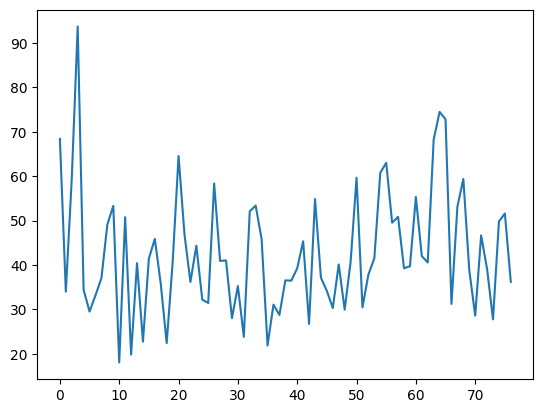

In [50]:
import matplotlib.pyplot as plt

df['rating'].plot(kind='line')
plt.show()

### Bar Plot


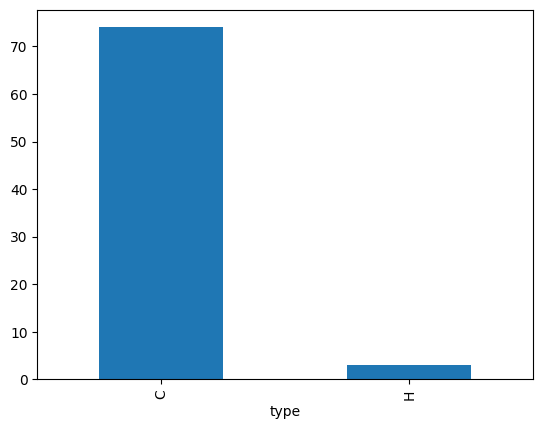

In [51]:
df['type'].value_counts().plot(kind='bar')
plt.show()

## Summary
This lesson provided an introduction to the Pandas library and its essential operations. Pandas is an indispensable tool in data analysis, enabling you to manipulate, clean, and analyze datasets with ease.

In this lesson, we covered:
- Installing Pandas

- Understanding `Series` and `DataFrame`

- Basic operations like reading/writing data, selecting, filtering, and grouping data

- Handling missing data

- Basic visualization with Pandas

## Additional Resources
- [Pandas Official Documentation](https://pandas.pydata.org/docs/)

- [Pandas Cheat Sheet](https://pandas.pydata.org/Pandas_Cheat_Sheet.pdf)

- [Kaggle's Pandas Tutorial](https://www.kaggle.com/learn/pandas)

- [Pandas DataFrame Guide (YouTube)](https://www.youtube.com/watch?v=vmEHCJofslg)